In [1]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [232]:
paths = ["SUMO_vis/SUMO_run/day1","SUMO_vis/SUMO_run/day2"]

ds = pd.DataFrame()

for path in paths:
    for file_name in os.listdir(path):
        try:
            temp = pd.read_csv(path + "//" + file_name, index_col='dateandtime',parse_dates=True)
            ds = ds.append(temp)
        except:
            ...

    

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\3758470475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\App

In [233]:
ds.tail()

,vehid,coord,gpscoord,spdK/m,edge,lane,displacement,turnAngle,vehDen
dateandtime,,,,,,,,,
2022-12-05 10:01:00,randUni6321:1,"[2554.102771723235, 1956.55290129953]","[31.328873239379277, 30.0580301271806]",63.393118,26206377#6,26206377#6_0,277.80,353.47,572
2022-12-05 10:01:00,randUni6707:1,"[3722.2898036290135, 2344.385719405685]","[31.34092895020041, 30.0616820956902]",39.733602,25584538#4,25584538#4_0,1935.79,264.25,572
2022-12-05 10:01:00,randUni7715:1,"[3446.212906988273, 1642.4218840315064]","[31.338171719695904, 30.055313711142567]",48.983581,:cluster_6572911074_6572911076_8074011433_8074...,:cluster_6572911074_6572911076_8074011433_8074...,869.20,173.72,572
2022-12-05 10:01:00,randUni8743:1,"[2997.7771553180514, 1434.12857662776]","[31.33355305666064, 30.053375897286948]",48.002734,:29982808#3-AddedOnRampNode_0,:29982808#3-AddedOnRampNode_0_1,2050.51,262.69,572
2022-12-05 10:01:00,randUni9450:1,"[4519.861274266404, 2664.756346929906]","[31.349152116057347, 30.06467621274879]",60.094158,25584650#1,25584650#1_0,1389.10,172.81,572


## LSTM on Every edge with Freq > 90%

In [234]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

In [34]:
temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '2T'  #one reading every 10 mins
                      )]
          ).mean()

In [238]:
temp

edge,-178543139#2,-182371948#0,-182371948#1,-182371948#2,-182371950#0,-182371950#1,-182371950#2,-182371955#0,-182371955#1,-182371955#2,...,:cluster_8574575726_8574575729_8574575735_8574575737_2,:cluster_8574575726_8574575729_8574575735_8574575737_4,:cluster_9848177603_9848177608_0,:cluster_9848177603_9848177608_1,:cluster_9848177603_9848177608_3,:cluster_9848177603_9848177608_4,:cluster_9848177603_9848177608_5,:cluster_9848177603_9848177608_6,:cluster_9848177603_9848177608_7,:cluster_9848177603_9848177608_8
dateandtime,,,,,,,,,,,,,,,,,,,,,
2022-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.855692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-05 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-05 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
temp.count().sort_values(ascending=False)

edge
858935302                          2148
700673538                          2023
819202035                          1999
885610134#4                        1888
858935315                          1887
                                   ... 
:6568207686_3                         1
-687613186                            1
:cluster_278876200_6574844035_4       1
:1927165515_8                         1
:6572827912_4                         1
Length: 6084, dtype: int64

In [242]:
limitPer = len(temp) *0.20
temp = temp.dropna(thresh=limitPer, axis=1)
temp.count()

edge
-178543139#2                    845
-215628990#1                    798
-215628990#2                    887
-26195753#4                     686
-26203057                      1254
                               ... 
947628159#3                    1116
947628159#4                     941
958778139#0-AddedOnRampEdge     874
971350102#1                    1165
:8771565283_0                  1102
Length: 204, dtype: int64

In [243]:
#fillna with max insteadx

In [291]:
df = temp.fillna(temp.max())

In [292]:
df = df.loc[:, (temp != 0).any(axis=0)]


In [293]:
# Compute the variance of each column in the dataframe
variances = df.var()

# Find the columns with variances greater than 100
high_variances = variances[variances > 100]

# Print the columns with variances greater than 100
print(high_variances)

edge
-178543139#2                   202.762139
-26195753#4                    132.183212
-26203057                      174.358178
-26203176#0                    139.003685
-26221563#0                    111.093605
                                  ...    
947628159#3                    495.403018
947628159#4                    588.091714
958778139#0-AddedOnRampEdge    109.699684
971350102#1                    176.970669
:8771565283_0                  369.121674
Length: 131, dtype: float64


In [294]:
filtered_df = df.loc[:, high_variances.index]

In [392]:
filtered_df.shape

(2880, 131)

In [295]:
#Smooth curve
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, 
                           mode='full'
                          )
    return y_smooth

In [296]:
smoothed_df = []
for cntrDf in range(0, filtered_df.shape[-1]):
    smoothed_df.append(smooth(filtered_df.values[:,cntrDf],30))

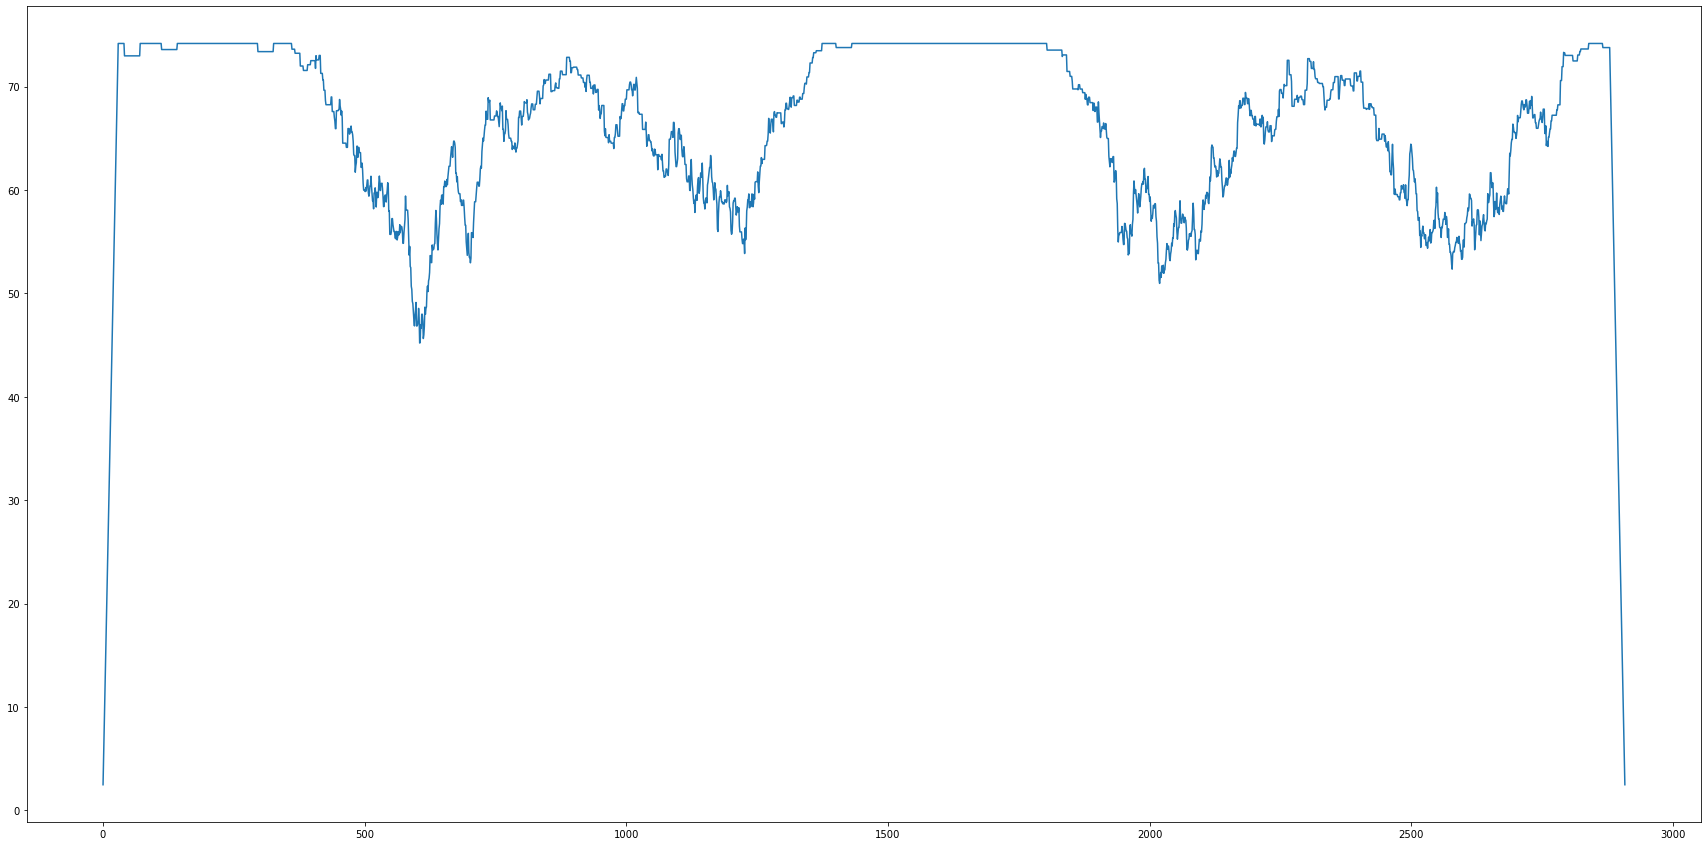

In [297]:
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smooth(df.values[:,0],40), 'r-', lw=2)
# plt.plot(smooth(df.values[:,0],30), 'b-', lw=1)
plt.plot(smoothed_df[0])



In [423]:
import numpy as np


In [432]:
np.asarray(train).shape

(131, 2909)

In [433]:
length

2909

In [469]:
np.asarray(filtered_df[:2000]).shape 

(2000, 131)

In [471]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

length = np.asarray(filtered_df).shape[-1]
train_size = int(length * 0.5)
test_size = length - train_size

train_  = filtered_df[0:train_size]
test_   = filtered_df[train_size:]

In [472]:
train = []
test = []
for cntrDf in range(0, train_.shape[-1]):
    train.append(smooth(train_.values[:,cntrDf],30))
    
for cntrDf in range(0, test_.shape[-1]):
    train.append(smooth(test_.values[:,cntrDf],30))
       

In [474]:
train

[array([ 2.47216067,  4.94432134,  7.41648201,  9.88864268, 12.36080334,
        14.83296401, 17.30512468, 19.77728535, 22.24944602, 24.72160669,
        27.19376736, 29.66592803, 32.1380887 , 34.61024937, 37.08241003,
        39.5545707 , 42.02673137, 44.49889204, 46.97105271, 49.44321338,
        51.91537405, 54.38753472, 56.85969539, 59.33185606, 61.80401672,
        64.27617739, 66.74833806, 69.22049873, 71.6926594 , 74.16482007,
        74.16482007, 74.16482007, 74.16482007, 74.16482007, 74.16482007,
        74.16482007, 74.16482007, 74.16482007, 74.16482007, 74.16482007,
        74.16482007, 72.96634029, 72.96634029, 72.96634029, 72.96634029,
        72.96634029, 72.96634029, 72.96634029, 72.96634029, 72.96634029,
        72.96634029, 72.96634029, 72.96634029, 72.96634029, 72.96634029,
        72.96634029, 72.96634029, 72.96634029, 72.96634029, 72.96634029,
        72.96634029, 72.96634029, 72.96634029, 72.96634029, 72.96634029,
        70.49417963, 68.02201896, 65.54985829, 63.0

In [473]:
train = scaler.fit_transform(train)
test  = scaler.fit_transform(test)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (262,) + inhomogeneous part.

In [ ]:
train

In [360]:
test

array([[0.82439152, 0.73151749, 0.73151749, ..., 0.73151749, 0.73151749,
        0.73151749],
       [0.89070002, 0.83289456, 0.83289456, ..., 0.83289456, 0.83289456,
        0.83289456],
       [0.85291336, 0.77512368, 0.77512368, ..., 0.77512368, 0.77512368,
        0.77512368],
       ...,
       [0.88326654, 0.82152974, 0.82152974, ..., 0.82152974, 0.82152974,
        0.82152974],
       [0.88248782, 0.82033917, 0.82033917, ..., 0.82033917, 0.82033917,
        0.82033917],
       [0.34592207, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

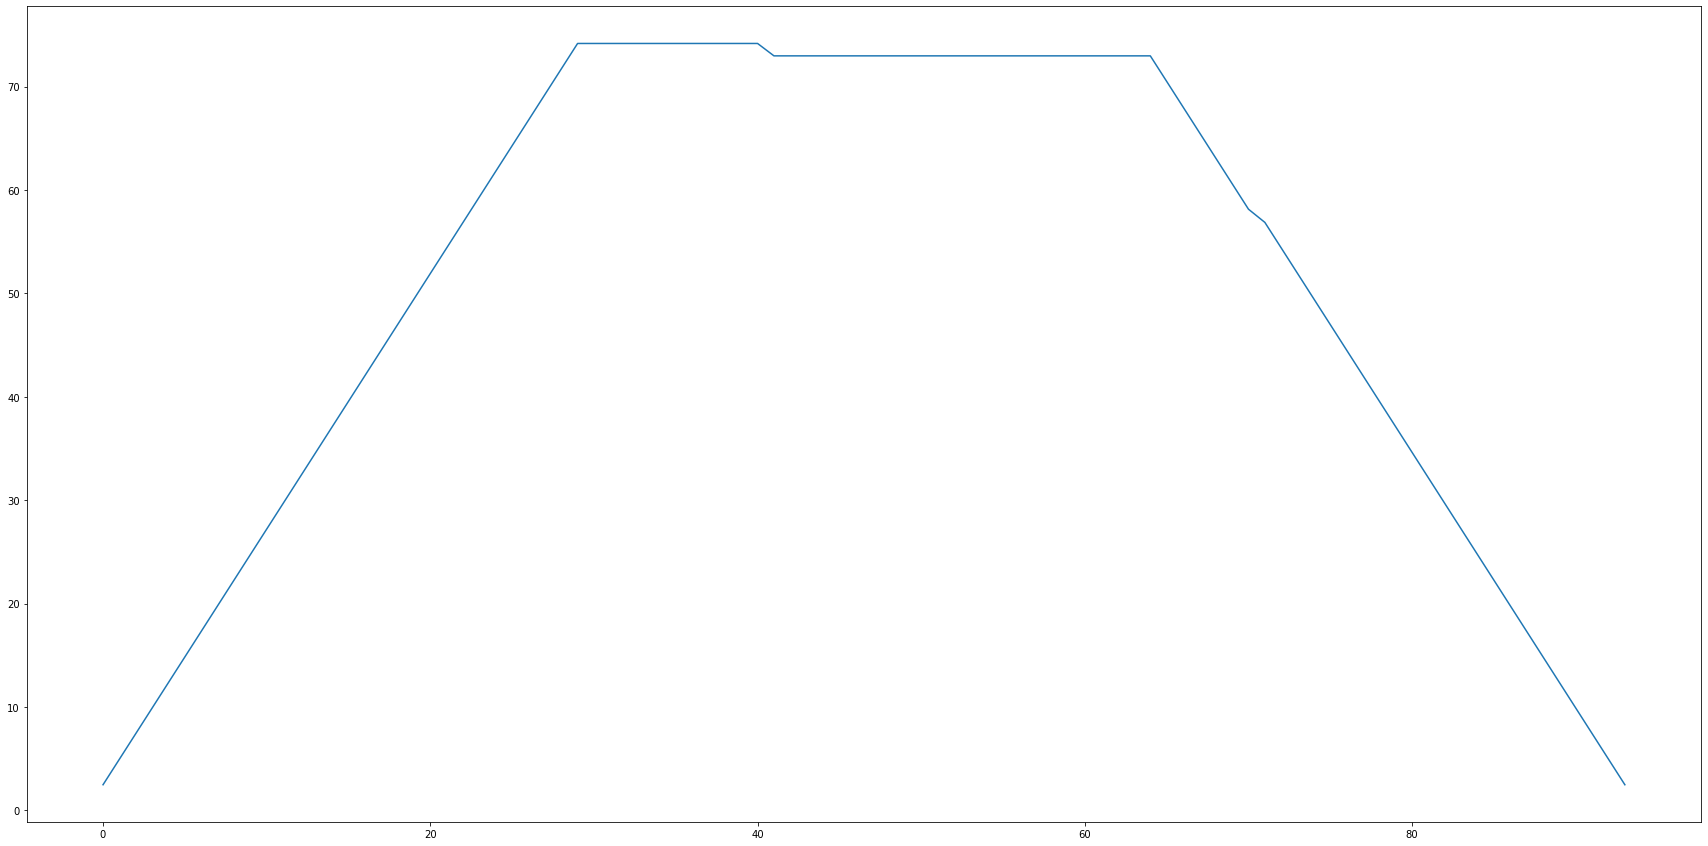

In [476]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(df.values[:,1])
plt.plot(train[0])
plt.show()

In [362]:
from keras.preprocessing.sequence import TimeseriesGenerator

# How many record to take into account
lookback = 20 #60mins
n_features = train.shape[-1]
batch_size = 1
generator = TimeseriesGenerator(train, train,
                                length=lookback, 
                                batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, 
                                    batch_size=batch_size)

In [363]:
x,y = generator[2]
print(x.shape, y.shape)

(1, 20, 2909) (1, 2909)


In [364]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [365]:
# define model
model = Sequential()
model.add(LSTM(50, return_sequences=True, activation='relu', input_shape=(lookback, train.shape[-1]))) 
model.add(Dense(train.shape[-1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20, 50)            592000    
                                                                 
 dense_8 (Dense)             (None, 20, 2909)          148359    
                                                                 
Total params: 740,359
Trainable params: 740,359
Non-trainable params: 0
_________________________________________________________________


In [367]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model.fit(generator,epochs=100, 
       #   validation_data=test_data_gen,
          callbacks=callback
         )

Epoch 1/100
45/45 [==============================] - 2s 34ms/step - loss: 0.0398
Epoch 2/100
45/45 [==============================] - 1s 32ms/step - loss: 0.0363
Epoch 3/100
45/45 [==============================] - 2s 34ms/step - loss: 0.0347
Epoch 4/100
45/45 [==============================] - 2s 34ms/step - loss: 0.0418
Epoch 5/100
45/45 [==============================] - 1s 32ms/step - loss: 0.0393
Epoch 6/100
45/45 [==============================] - 1s 33ms/step - loss: 0.0456
Epoch 7/100
45/45 [==============================] - 1s 31ms/step - loss: 0.0434
Epoch 8/100
45/45 [==============================] - 2s 34ms/step - loss: 0.0406
Epoch 9/100
45/45 [==============================] - 2s 37ms/step - loss: 0.0391
Epoch 10/100
45/45 [==============================] - 2s 44ms/step - loss: 0.0398
Epoch 11/100
45/45 [==============================] - 2s 39ms/step - loss: 0.0429
Epoch 12/100
45/45 [==============================] - 1s 32ms/step - loss: 0.0360
Epoch 13/100
45/45 [=====

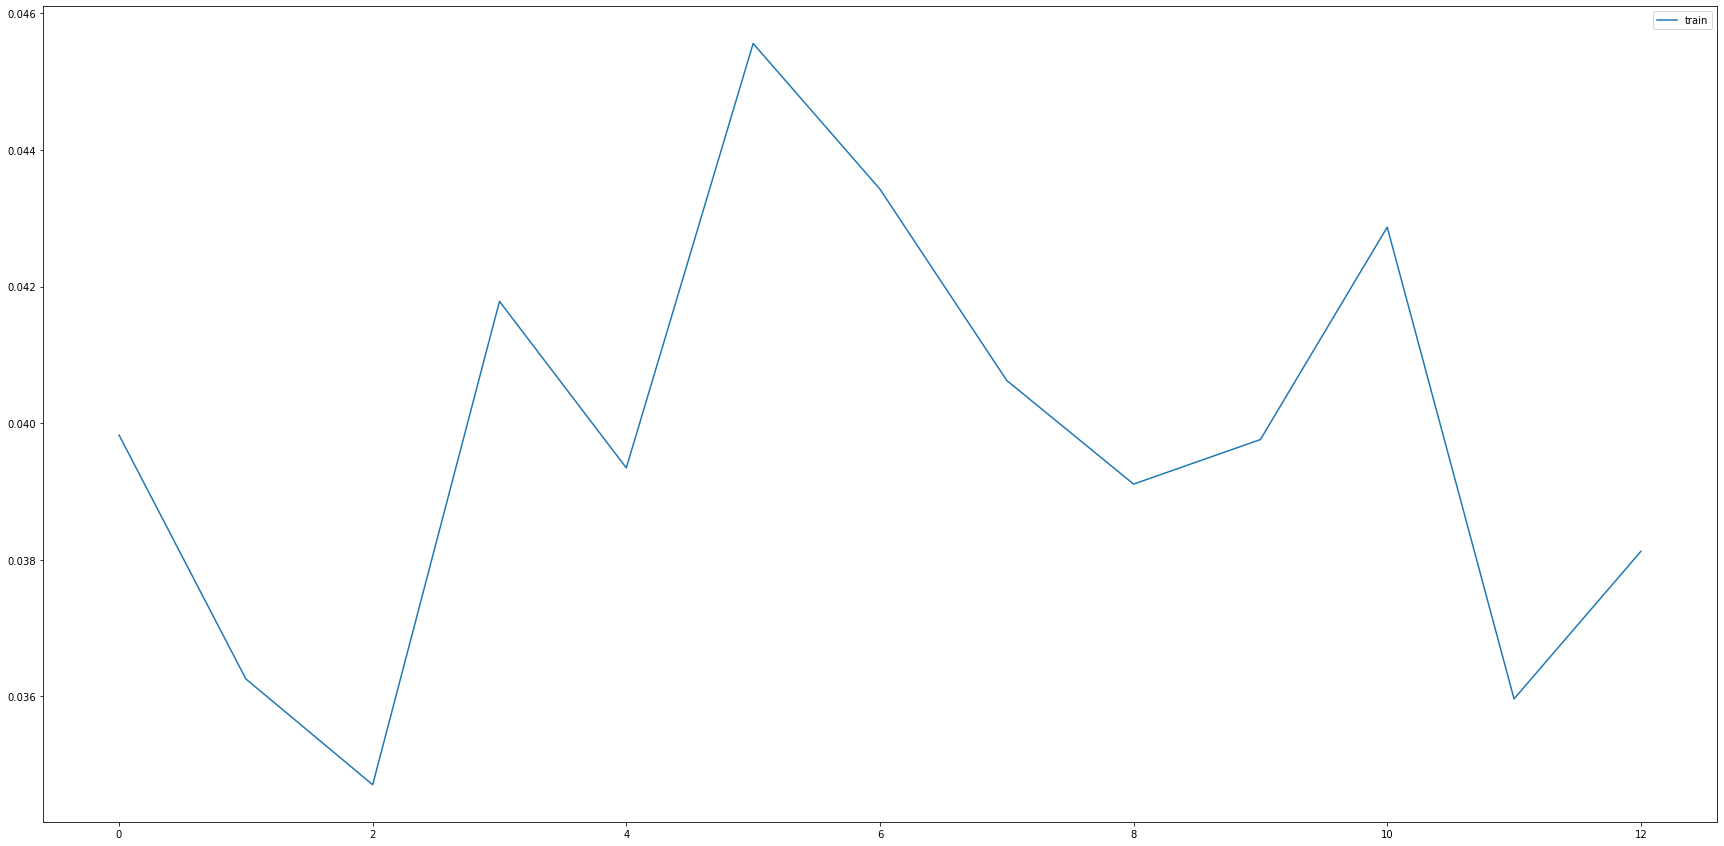

In [368]:
# plot training history
plt.plot(model.history.history['loss'], label='train')
#plt.plot(model.history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [369]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [370]:
model.evaluate_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_12380\2210199054.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)


0.06165656819939613

In [411]:
train_predictions = []
for i in range(len(trainPredict)):
    
    # get the prediction value for the first batch
    current_pred = trainPredict[i,0,0]
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    

In [418]:
test_predictions = []
for i in range(len(testPredict)):
    
    # get the prediction value for the first batch
    current_pred = testPredict[i,0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    

In [413]:
# train_predictions = trainPredict.reshape(len(trainPredict),trainPredict.shape[-1])
# test_predictions = testPredict.reshape(len(testPredict),testPredict.shape[-1])

In [417]:
testPredict[2,0]

array([0.70741373, 0.66666025, 0.65844995, ..., 0.6434394 , 0.66332334,
       0.75516385], dtype=float32)

In [415]:
test_predictions

[0.66486996,
 0.6880333,
 0.70741373,
 0.7234579,
 0.74629277,
 0.74913466,
 0.70997405,
 0.6955389,
 0.7762534,
 0.77520514,
 0.7471721,
 0.51684654,
 0.6639387,
 0.6563432,
 0.5989937,
 0.55312157,
 0.5850413,
 0.48095798,
 0.70686996,
 0.6628962,
 0.5250489,
 0.65517056,
 0.75020754,
 0.7449468,
 0.7475637,
 0.74899024,
 0.69429785,
 0.67330205,
 0.7467164,
 0.76423717,
 0.7421631,
 0.5603642,
 0.7141044,
 0.76140386,
 0.7249687,
 0.67419153,
 0.71154094,
 0.75758475,
 0.63846076,
 0.67349917,
 0.6321345,
 0.7109337,
 0.6730563,
 0.77220637,
 0.6804849,
 0.71726084]

In [416]:
true_predictionsTr = scaler.inverse_transform(train_predictions)
true_predictionsTs = scaler.inverse_transform(test_predictions)

ValueError: Expected 2D array, got 1D array instead:
array=[0.7095241  0.74806589 0.74744356 0.71474427 0.72827995 0.72906256
 0.74956542 0.68549365 0.69351172 0.72411817 0.74645734 0.73680961
 0.69474131 0.74111992 0.72092968 0.68859649 0.74778181 0.74427301
 0.72656381 0.70007473 0.6899237  0.74469465 0.55611128 0.77229756
 0.76785046 0.75878799 0.69710046 0.6930868  0.62534839 0.73958254
 0.75465524 0.77135181 0.76830292 0.68534654 0.6847313  0.67108732
 0.31387478 0.70582634 0.68422192 0.81498361 0.63857275 0.74911761
 0.74322391 0.71403754 0.72689003].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [379]:
true_predictionsTs

array([[2.07013118, 4.5105651 , 6.73438968, ..., 6.67840993, 4.50142578,
        2.36546423],
       [2.11702294, 4.56310593, 6.7833163 , ..., 6.74966016, 4.52277375,
        2.38861244],
       [2.15625667, 4.61437562, 6.88894932, ..., 6.82932236, 4.60553873,
        2.42437662],
       ...,
       [2.28742269, 4.76870527, 7.09096641, ..., 7.04881615, 4.73061972,
        2.50564073],
       [2.10174199, 4.54414429, 6.75108575, ..., 6.72139409, 4.49947511,
        2.37694331],
       [2.17619112, 4.63695953, 6.91194181, ..., 6.86029187, 4.61681388,
        2.43477295]])

In [380]:
# preds = np.concatenate((df[:lookback],true_predictionsTr, df[train_size:train_size+lookback], true_predictionsTs), axis=0)

In [391]:
(train.shape)

(65, 2909)

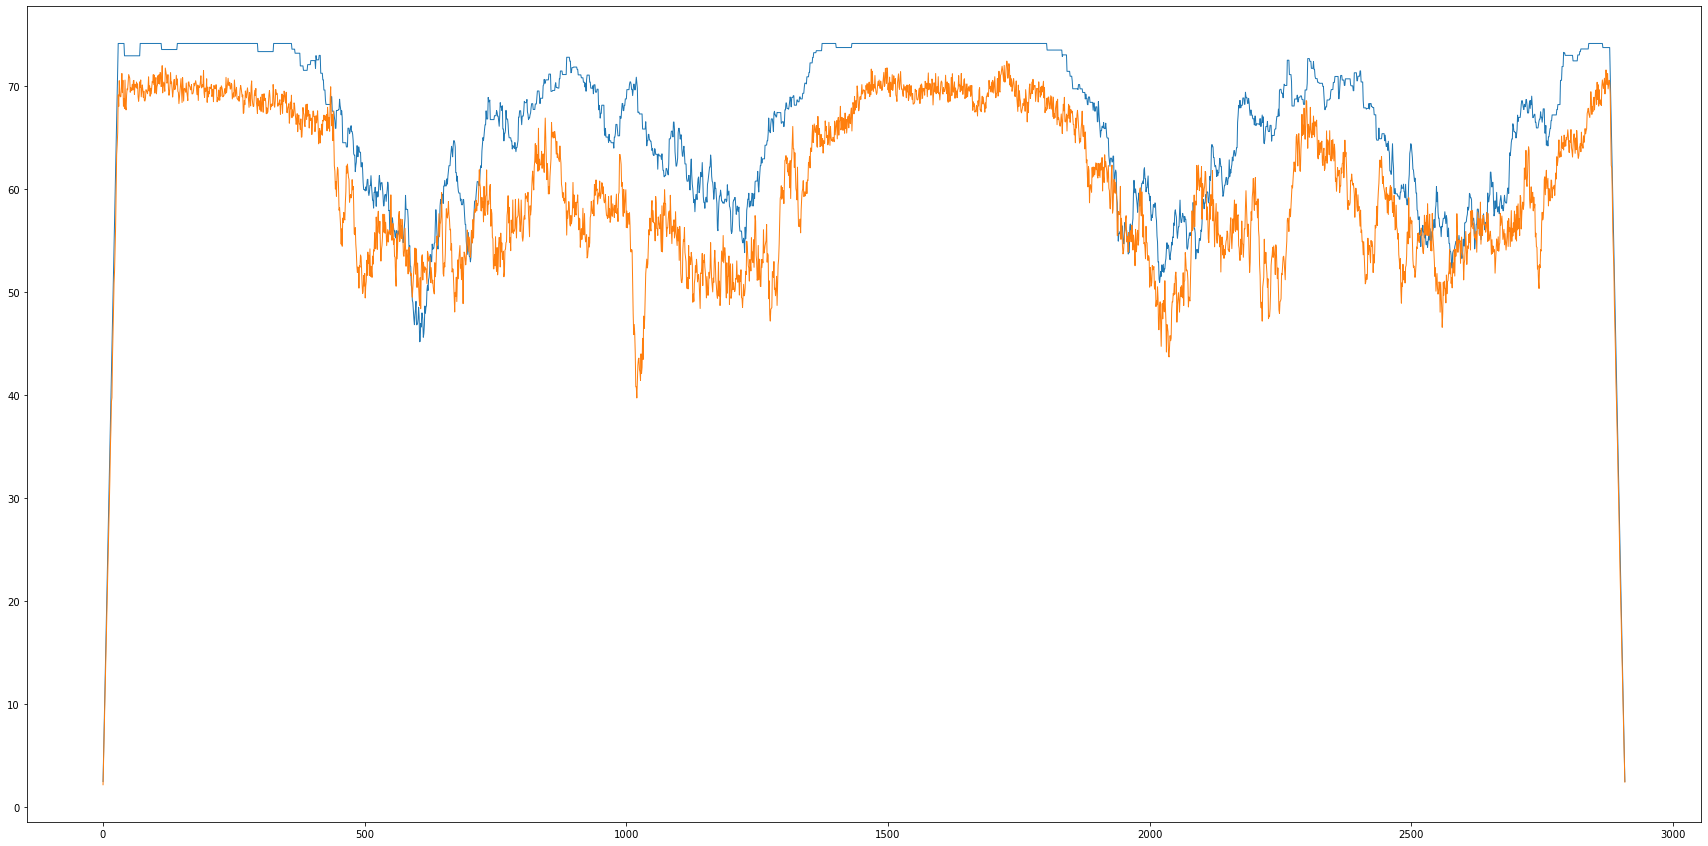

In [395]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
plt.plot(smoothed_df[0],lw=1)
# plt.plot(true_predictionsTr[0])
plt.plot(true_predictionsTr[0],lw=1)
#plt.legend(['actual data','Predicted data'],loc='best')
plt.show()

In [176]:
model.save("LSTMMultiEdges.h5")

## Prediction on the average city speed -unfinished

In [5]:
df = ds.drop(['coord','gpscoord','lane'],1)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\1701734751.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = ds.drop(['coord','gpscoord','lane'],1)


In [6]:
df = df.resample('3min').mean()
df

,spdK/m,displacement,turnAngle,vehDen
dateandtime,,,,
2023-02-17 00:00:00,58.992090,2237.262857,196.483892,57.916256
2023-02-17 00:03:00,55.791728,1622.110226,205.790827,40.293233
2023-02-17 00:06:00,60.170339,1577.768110,178.990472,42.401575
2023-02-17 00:09:00,60.403732,1698.545423,213.101408,47.422535
2023-02-17 00:12:00,58.263913,1704.683490,201.942685,49.953020
...,...,...,...,...
2023-02-17 23:45:00,59.454828,1832.952150,202.986542,107.523364
2023-02-17 23:48:00,59.053985,1795.112621,213.928220,103.077670
2023-02-17 23:51:00,52.242362,1850.092345,195.741552,97.234483


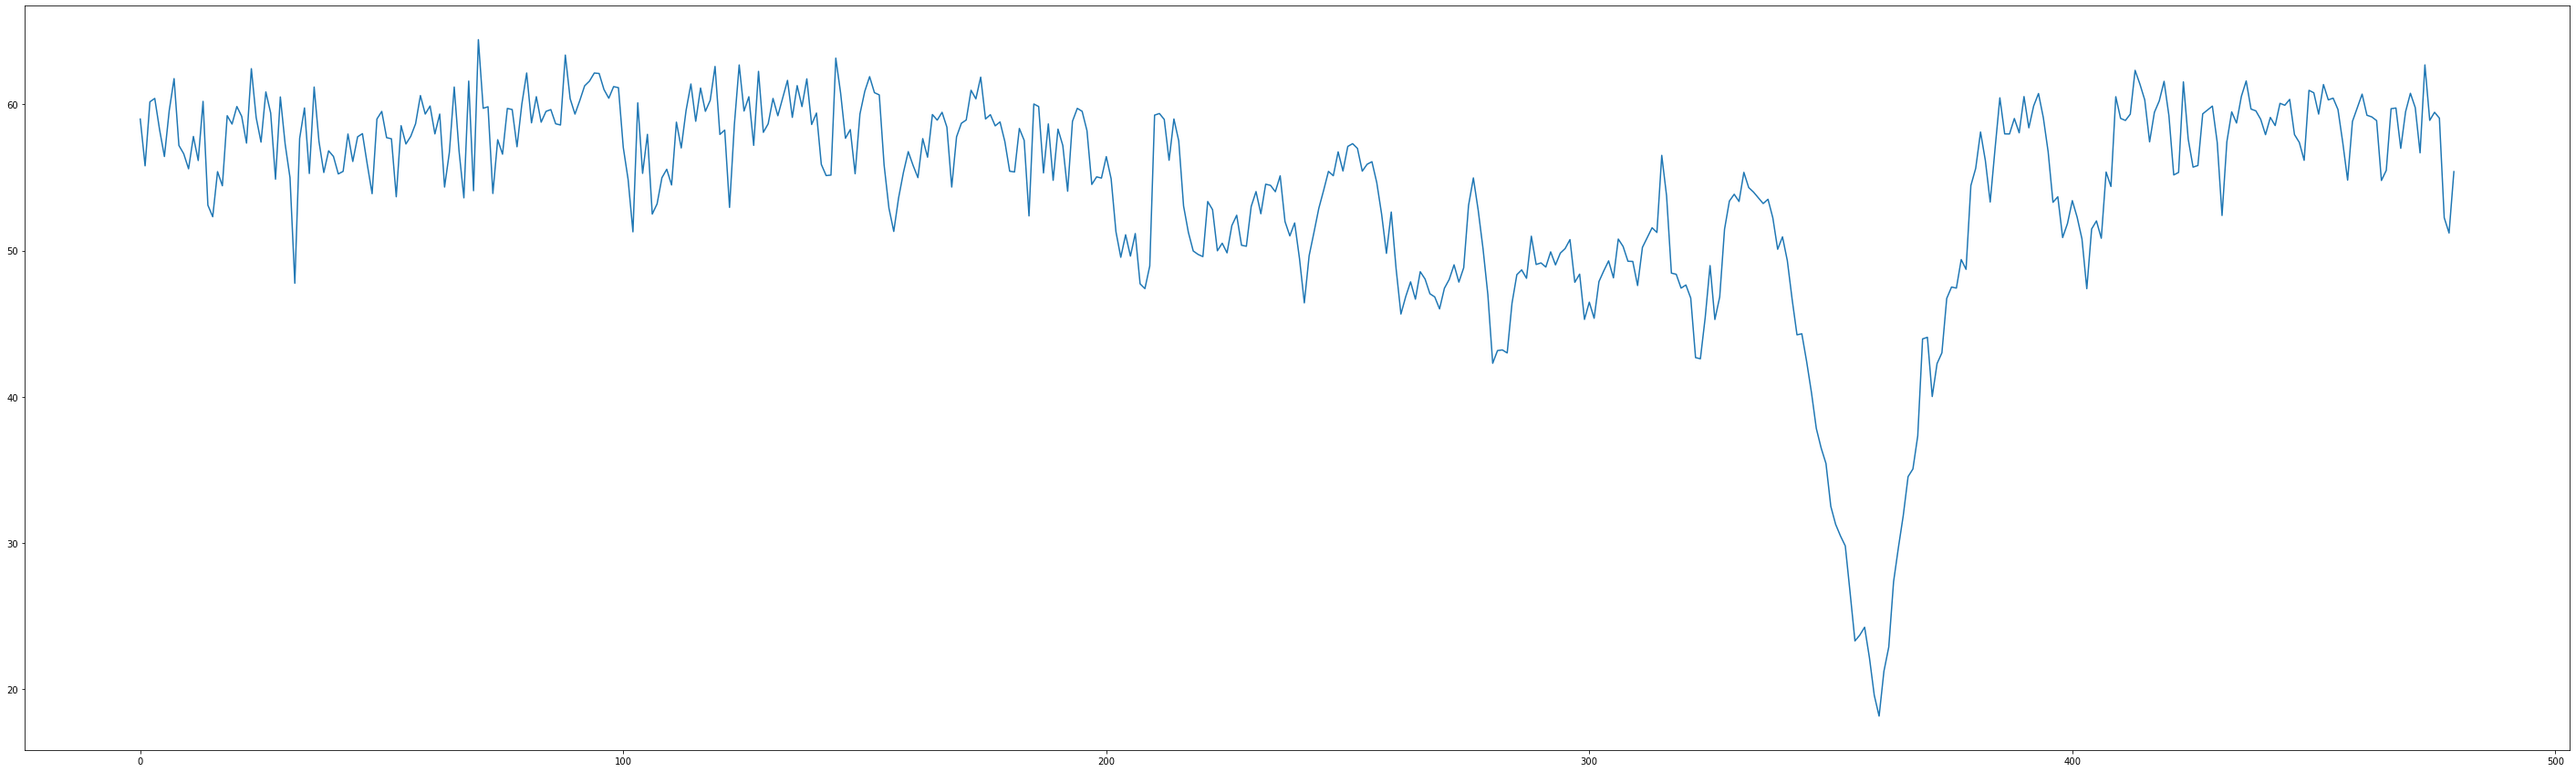

In [7]:
values = df.values
plt.rcParams["figure.figsize"] = (50,15)
plt.plot(values[:, 0])


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train  = df[0:train_size]
test   = df[train_size:]

In [10]:
scaler = MinMaxScaler()

train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])


In [11]:
trainY = train['spdK/m']
testY  = test['spdK/m']

trainX = train.drop(['spdK/m'],1)
testX = test.drop(['spdK/m'],1)
trainX

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainX = train.drop(['spdK/m'],1)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testX = test.drop(['spdK/m'],1)


,displacement,turnAngle,vehDen
dateandtime,,,
2023-02-17 00:00:00,2237.262857,196.483892,57.916256
2023-02-17 00:03:00,1622.110226,205.790827,40.293233
2023-02-17 00:06:00,1577.768110,178.990472,42.401575
2023-02-17 00:09:00,1698.545423,213.101408,47.422535
2023-02-17 00:12:00,1704.683490,201.942685,49.953020
...,...,...,...
2023-02-17 18:57:00,1786.411093,197.825471,421.631829
2023-02-17 19:00:00,2023.805194,197.219635,429.465839
2023-02-17 19:03:00,1967.196782,191.184425,403.011580


In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [13]:
# How many record to take into account
lookback = 5 #15mins
n_features = df.shape[-1]
batch_size = 1
generator = TimeseriesGenerator(trainX, trainY,
                                length=lookback, 
                                batch_size=batch_size)

test_data_gen = TimeseriesGenerator(testX, testY,
                                    length=lookback, 
                                    batch_size=batch_size)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
# define model
model = Sequential()
model.add(LSTM(50, return_sequences=False, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(200, return_sequences=True, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(100, return_sequences=False, activation='sigmoid', input_shape=(None, trainX.shape[-1]))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [94]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10800     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [95]:
# fit model
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

model.fit(generator,epochs=200, callbacks = es)

Epoch 1/200
379/379 [==============================] - 3s 2ms/step - loss: 7078.7109
Epoch 2/200
379/379 [==============================] - 1s 2ms/step - loss: 1227.3009
Epoch 3/200
379/379 [==============================] - 1s 2ms/step - loss: 438.4662
Epoch 4/200
379/379 [==============================] - 1s 2ms/step - loss: 3576.5002
Epoch 5/200
379/379 [==============================] - 1s 2ms/step - loss: 1018.1528
Epoch 6/200
379/379 [==============================] - 1s 2ms/step - loss: 737.1349
Epoch 7/200
379/379 [==============================] - 1s 2ms/step - loss: 192.8212
Epoch 8/200
379/379 [==============================] - 1s 2ms/step - loss: 456.0615
Epoch 9/200
379/379 [==============================] - 1s 2ms/step - loss: 273.7569
Epoch 10/200
379/379 [==============================] - 1s 2ms/step - loss: 432.7608
Epoch 11/200
379/379 [==============================] - 1s 2ms/step - loss: 198.0078
Epoch 12/200
379/379 [==============================] - 1s 2ms/step - 

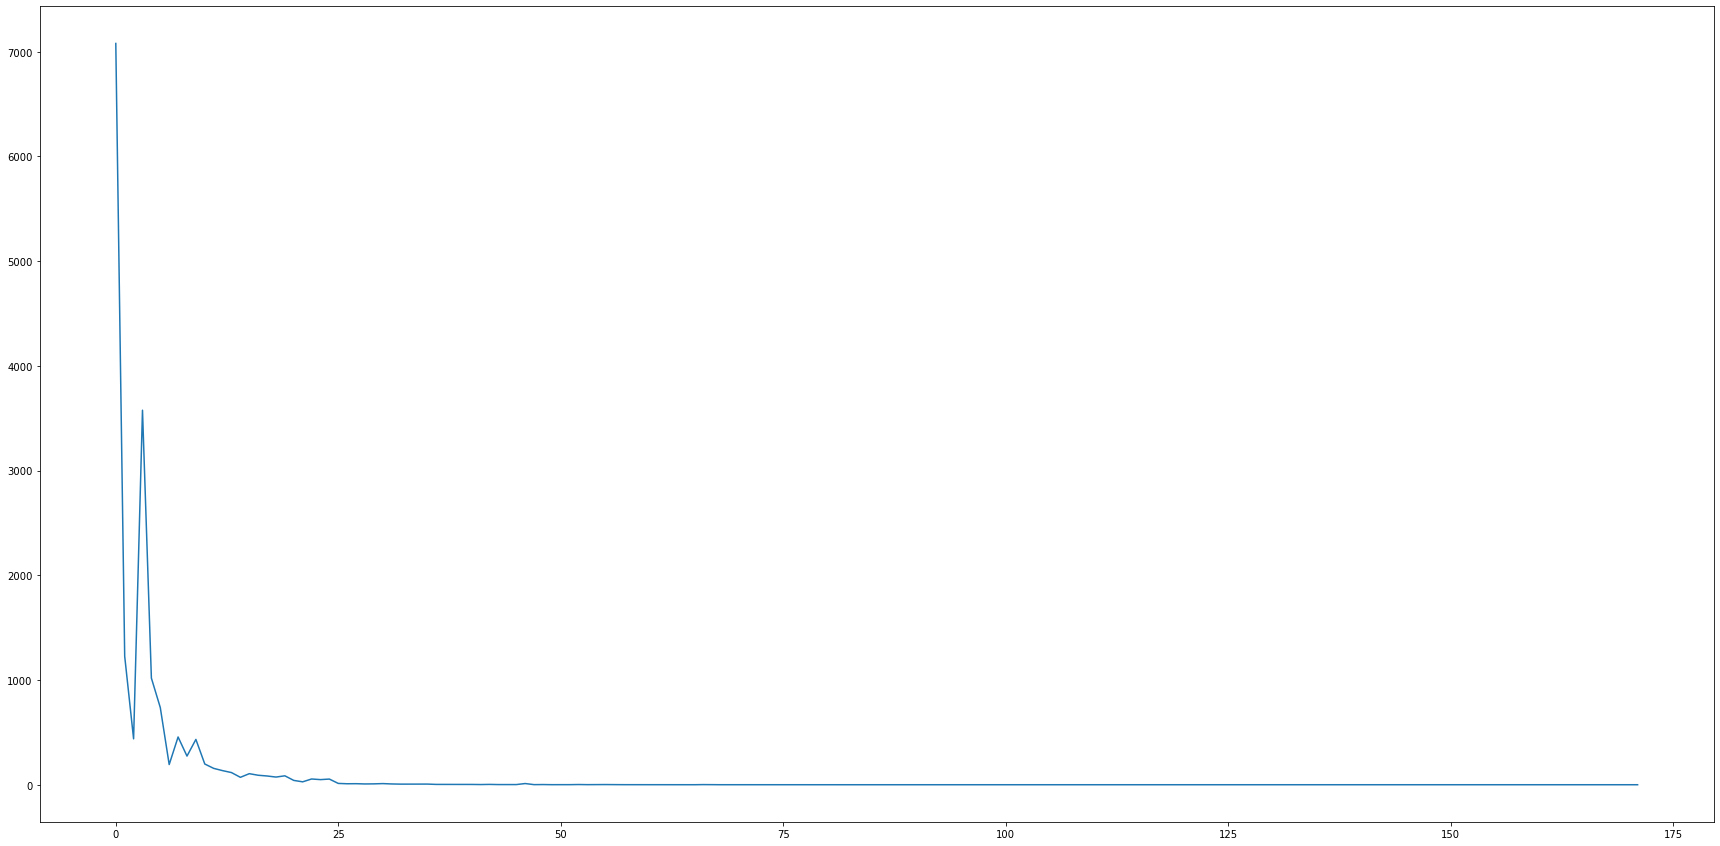

In [96]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [97]:
from tensorflow.keras.models import load_model


In [98]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [99]:
test_predictions = []
for i in range(len(testPredict)):
    
    # get the prediction value for the first batch
    current_pred = testPredict[i,0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 


In [100]:
train_predictions = []
for i in range(len(trainPredict)):
    
    # get the prediction value for the first batch
    current_pred = trainPredict[i,0]
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    


In [101]:
#true_predictionsTr = scaler.inverse_transform(test_predictions)
#true_predictionsTs = scaler.inverse_transform(train_predictions)


In [102]:
preds = np.concatenate((true_predictionsTs, true_predictionsTr), axis=0)


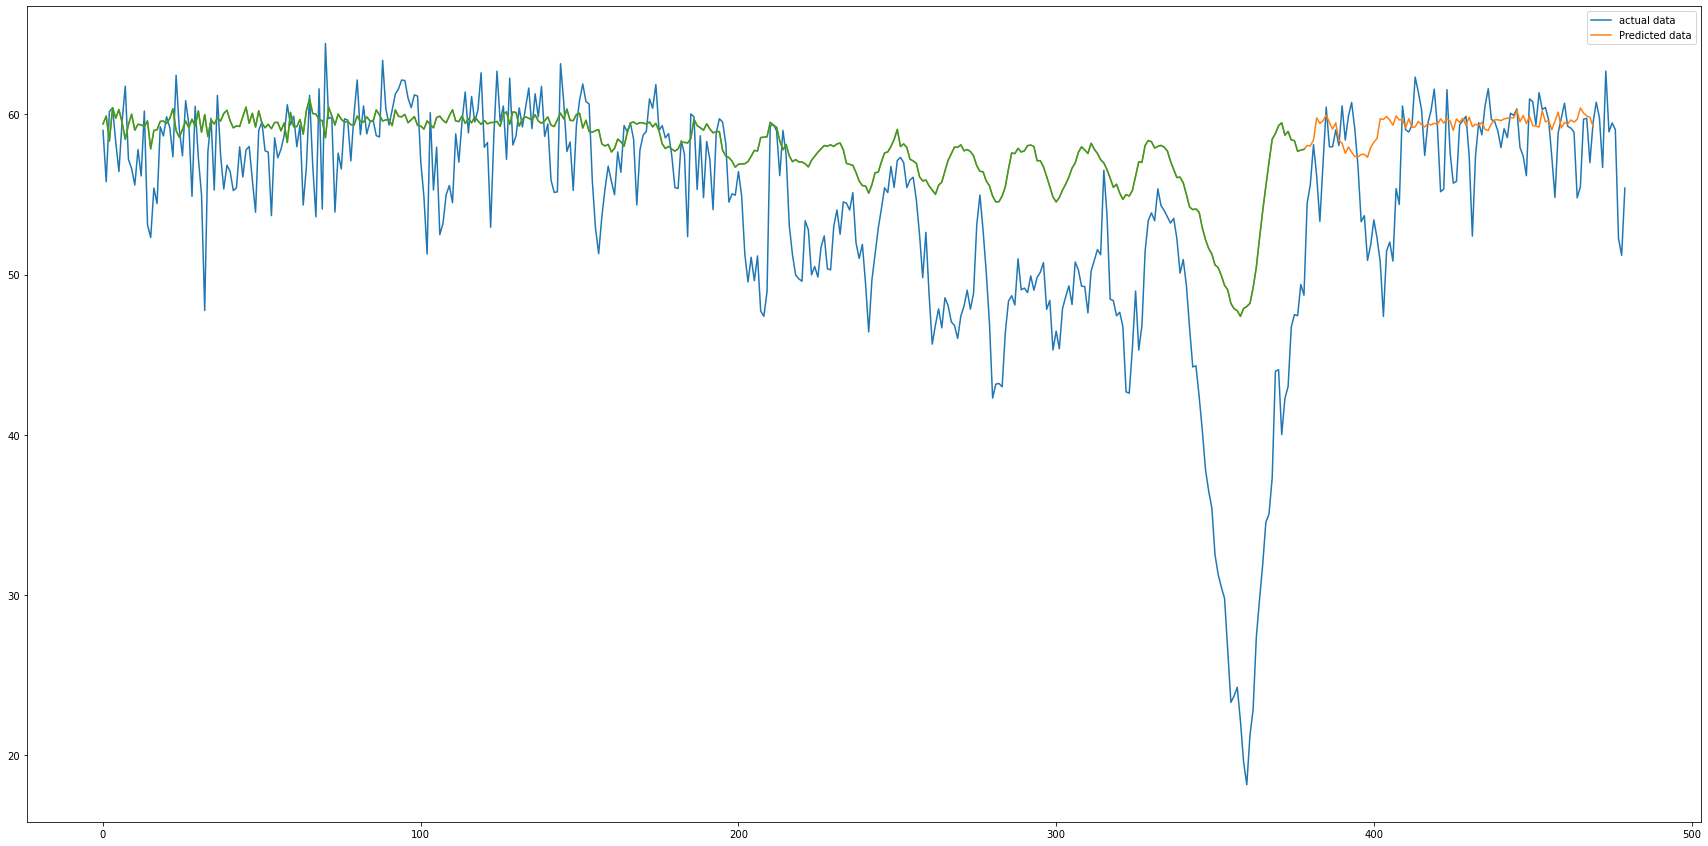

In [92]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
plt.plot(values[:, 0])
plt.plot(preds)
plt.plot(true_predictionsTs)
plt.legend(['actual data','Predicted data'],loc='best')
plt.show()

In [262]:
model.save("steepVanillaLSTM3min.h5")